In [2]:
# 모듈 로딩 ------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

## 데이터 분석 & 목적 --------------------------------------------------

- 데이터 구성 =>  방법 ? 지도 / 비지도  
    * 데이터/피쳐/특성/변수/속성/독립변수/관측값 ------  결과/타겟/라벨/클래스/종속변수/반응변수
- 데이터 목적 =>  결과/타겟/종속변수 ---> 수치형 : 회귀 ,   범주형 : 분류
- 학습 방법 => 해당하는 학습 방법 => all_estimator()

### [1]  데이터 준비 -------------------------------------------------------------------------

- 데이터 로딩 & 기본 데이터 확인

In [3]:
FILE = '../data/student_info.csv'

In [4]:
stdDF=pd.read_csv(FILE, usecols=[2,3])

In [7]:
stdDF.head(3)

,weight_kg,height_cm
0,98,198
1,77,170
2,70,170


In [6]:
stdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   weight_kg  90 non-null     int64
 1   height_cm  90 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


### [2] 데이터 전처리 ------------------------------------------------------------------------
- 데이터 정제 : 결측치, 중복값, 이상치, 모순값
- 데이터 표준화 : 단위, 자료형
- 데이터 정규화 : 수치값 => 값의 범위 : 통일 --> 스케일러 
    * 범주형/글자 => OrdinalEncder, OneHotEncoder, LabelEncoder(y)
- 데이터 변 형 : 특성 추가/ 생성  

In [8]:
# 결측치 체크
stdDF.isnull().sum()

weight_kg    0
height_cm    0
dtype: int64

In [ ]:
# bmi 특성 추가 -----------------------------------------------

In [11]:
bmi_value=round(stdDF.weight_kg/((stdDF.height_cm/100)*(stdDF.height_cm/100)), 1)

In [61]:
# ~18.5  ~ 23.0 ~ 25.0 ~  30.0 ~ ==> L, N, O, B, H   =>   0, 1, 2, 3, 4
#_bins=[0, 18.5, 23.0, 25.0, 30.0, max(bmi_value)]
_bins=[0, 18.5, 23.0,max(bmi_value)]
bmi_level=pd.cut(bmi_value, bins=_bins, labels=[0,1,2])

In [62]:
bmi_level.value_counts()

2    54
1    28
0     8
dtype: int64

In [63]:
stdDF['bmi_level']=bmi_level

In [69]:
stdDF.head()

,weight_kg,height_cm,bmi_level
0,98,198,2
1,77,170,2
2,70,170,2
3,90,198,1
4,71,170,2


In [70]:
# 특성 데이터의 범위 확인 
stdDF.describe().T[['min', 'max']]

,min,max
weight_kg,43.0,110.0
height_cm,132.0,198.0


In [71]:
stdDF.describe().T['max'] -  stdDF.describe().T['min']

weight_kg    67.0
height_cm    66.0
dtype: float64

In [72]:
# 수치형 특성 데이터 스케일링 
st=StandardScaler()
st_data=st.fit_transform(stdDF[stdDF.columns[:-1]])

In [73]:
mmt=MinMaxScaler()
mmt_data = mmt.fit_transform(stdDF[stdDF.columns[:-1]])

In [74]:
# 데이터 -- 타겟/라벳/클래스 분리
data=stdDF[stdDF.columns[:-1]]
target = stdDF[stdDF.columns[-1]]

In [111]:
data = st_data

In [112]:
data.shape, target.shape

((90, 2), (90,))

### [3] 학습용 데이터 준비 ==> 학습용, 테스트용, 검증용 ---------------------------

- 분류 => 항목 비율
    * 데이터 추가 
    * 업샘플링/다운샘플링 
    * API의 매개변수에 비율조정한 매개변수 체크
- 교차검증

In [113]:
# 타겟의 분류 데이터의 비율이 고르지 않음 => 비율에 맞도록 데이터 분리
X_train, X_test, y_train,y_test = train_test_split(data, target, 
                                                  random_state=11,
                                                  test_size=0.2,
                                                  stratify=target)

In [114]:
len(y_train), y_train.value_counts(), len(y_test), y_test.value_counts()

(72,
 2    43
 1    22
 0     7
 Name: bmi_level, dtype: int64,
 18,
 2    11
 1     6
 0     1
 Name: bmi_level, dtype: int64)

### [4] 학습 모델 객체 생성 및 학습 진행 -----------------------------------------------

In [115]:
# 분류 KNN 모델 객체 생성  ---- n_neighbors = 5  기본값   
knnModel=KNeighborsClassifier(n_neighbors=1)

In [116]:
scores=[]
for n in range(1, X_train.shape[0]):
    knnModel.n_neighbors = n  
    knnModel.fit(X_train, y_train)
    sc=knnModel.score(X_train, y_train)
    print(f'[{n}] : score ;{sc}')
    scores.append(sc)

[1] : score ;1.0
[2] : score ;0.9305555555555556
[3] : score ;0.9027777777777778
[4] : score ;0.9166666666666666
[5] : score ;0.9305555555555556
[6] : score ;0.9166666666666666
[7] : score ;0.9166666666666666
[8] : score ;0.9305555555555556
[9] : score ;0.9027777777777778
[10] : score ;0.875
[11] : score ;0.875
[12] : score ;0.875
[13] : score ;0.8472222222222222
[14] : score ;0.8472222222222222
[15] : score ;0.8055555555555556
[16] : score ;0.8055555555555556
[17] : score ;0.7777777777777778
[18] : score ;0.7777777777777778
[19] : score ;0.7777777777777778
[20] : score ;0.7777777777777778
[21] : score ;0.7638888888888888
[22] : score ;0.7777777777777778
[23] : score ;0.7638888888888888
[24] : score ;0.7638888888888888
[25] : score ;0.7638888888888888
[26] : score ;0.7638888888888888
[27] : score ;0.75
[28] : score ;0.75
[29] : score ;0.7361111111111112
[30] : score ;0.75
[31] : score ;0.7638888888888888
[32] : score ;0.6944444444444444
[33] : score ;0.7361111111111112
[34] : score ;0.

Text(0, 0.5, 'score')

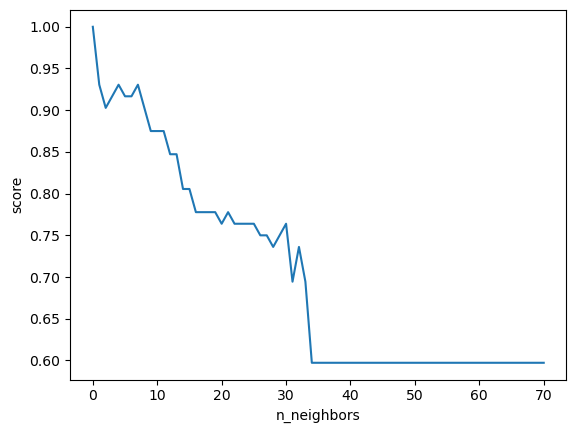

In [117]:
plt.plot(scores)
plt.xlabel('n_neighbors')
plt.ylabel('score')

In [118]:
#  결정된 n_neighbors = 2 또는 7
knnModel.n_neighbors = 7
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### [5]  예측 및 평가 ---------------------------------------------------------------------

- 검증 데이터 => 예측 & 평가
- 테스트 데이터 => 예측 & 평가

In [119]:
y_pre=knnModel.predict(X_test)

accuracy_score(y_test, y_pre)

0.8333333333333334

In [120]:
knnModel.score(X_test, y_test)

0.8333333333333334

### [6] 결과 --------------------------------------------------------------------------------

- 성능 만족스럽지 않음 ==> 튜닝 (하이퍼파라미터)
- 성능 만족스러움 => 모델 저장 

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
#  하이퍼파라미터 =>  n_neighbors, p, weights

model = KNeighborsClassifier()
params = {'n_neighbors' : [2,3,4,5], 'p':[1,2], 'weights' : ['uniform', 'distance']}

grid=GridSearchCV(model, param_grid=params, scoring="accuracy", cv=3)

In [123]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [124]:
grid.cv_results_

{'mean_fit_time': array([0.0003322 , 0.0006632 , 0.00066415, 0.0001804 , 0.00033243,
        0.00033188, 0.00033196, 0.00099937, 0.00033212, 0.        ,
        0.00044656, 0.00033236, 0.00066439, 0.        , 0.0003322 ,
        0.00102941]),
 'std_fit_time': array([4.69796871e-04, 4.68956207e-04, 4.69628536e-04, 2.55128923e-04,
        4.70134046e-04, 4.69347305e-04, 4.69459697e-04, 5.59592779e-06,
        4.69684480e-04, 0.00000000e+00, 4.11504159e-04, 4.70021655e-04,
        4.69796871e-04, 0.00000000e+00, 4.69796871e-04, 4.65872317e-05]),
 'mean_score_time': array([0.00066511, 0.00033204, 0.00066185, 0.00089661, 0.00099929,
        0.00066447, 0.00101725, 0.        , 0.00099699, 0.00099667,
        0.0005335 , 0.00066749, 0.00066447, 0.00099643, 0.00102218,
        0.        ]),
 'std_score_time': array([4.70307075e-04, 4.69572088e-04, 4.68008970e-04, 2.92350850e-04,
        2.23938669e-06, 4.69864046e-04, 2.83830506e-05, 0.00000000e+00,
        2.92218150e-06, 1.12391596e-07, 4.34

In [125]:
grid.best_params_, grid.best_score_

({'n_neighbors': 4, 'p': 2, 'weights': 'distance'}, 0.8888888888888888)

In [126]:
model=grid.best_estimator_